# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle
import numpy as np

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = y_train.max()+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [5]:
def convertToOneHot(y):
    oneHot = np.zeros((len(y), max(y) + 1))
    oneHot[np.arange(0, len(y)), y] = 1
    return oneHot

Y_train = convertToOneHot(y_train)
Y_test = convertToOneHot(y_test)
Y_valid = convertToOneHot(y_valid)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

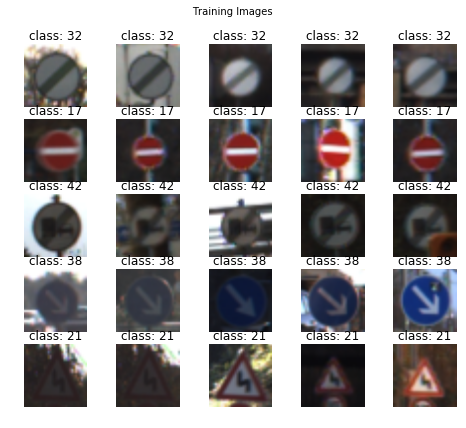

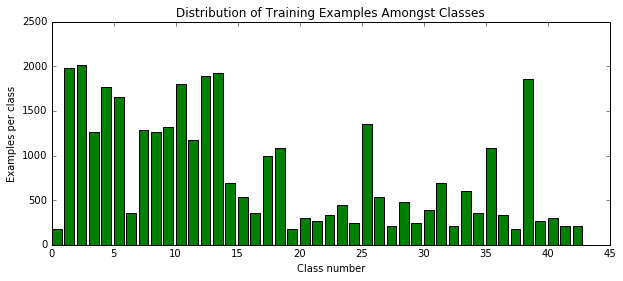

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


def show_images(image_dataset, n_rows, n_cols, graph_title='Training Images'):
    plt.figure(figsize=(8, 6.5))
    selected_classes = np.random.randint(44, size=n_rows)
    image_number = 1
    for row in selected_classes:
        for col in range(1, n_cols + 1):
            plt.subplot(n_rows, n_cols, image_number)
            image_number += 1
            x_selected = X_train[y_train == row]
            random_index = np.random.randint(x_selected.shape[0])
            plt.imshow(x_selected[random_index, :, :, :]) 
            plt.axis('off')
            plt.title('class: {}'.format(row))  
    plt.suptitle(graph_title)
    plt.show()
    
    
def show_class_distribution(class_labels):
    plt.figure(figsize=(10, 4))
    examples_per_class = np.bincount(class_labels)
    num_classes = len(examples_per_class)
    plt.bar(np.arange(num_classes), examples_per_class, 0.8, color='green', label='Inputs per class')
    plt.xlabel('Class number')
    plt.ylabel('Examples per class')
    plt.title('Distribution of Training Examples Amongst Classes')
    plt.show()   
    
show_images(X_train, 5, 5)
show_class_distribution(y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Preprocessing

In [9]:
from skimage import exposure

def preprocessing(X):
    #Scaling features
    X = (X / 255.).astype(np.float32)
    
    #Converting to grayscale using BT.601 recommendation
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
#     X -= np.mean(X, axis = 0)
#     X /= np.std(X, axis = 0)
      
    for i in range(X.shape[0]):
        X[i] = exposure.equalize_adapthist(X[i])

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X

In [10]:
X_train = preprocessing(X_train)
X_valid = preprocessing(X_valid)
X_test = preprocessing(X_test)

C:\Users\Saurabh Gupta\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [11]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

### Q1 - Preprocessing techniques used
- All images were scaled down as it helps in SGD to converge quickly. From my experiments, I found that scaling worked better than mean normalization so I didn't use mean normalization finally.
- Images were converted to grayscale using [BT.601 recommendation](https://en.wikipedia.org/wiki/Rec._601).
- Contrast Limited Adaptive Histogram Equalization (CLAHE) was used to improve the contrast in images. It is suitable for improving the local contrast and enhancing the definitions of edges in each region of an image.
- One-hot encoding was used to convert labels to vectors.
- The dataset was shuffled.


### Model Architecture

In [16]:
from collections import namedtuple

HyperParam = namedtuple('Parameters', [
        'num_classes', 'batch_size', 'max_epochs',
        'learning_rate', 'l2_lambda',
        'conv1_k', 'conv1_d', 'conv1_p', 
        'conv2_k', 'conv2_d', 'conv2_p', 
        'conv3_k', 'conv3_d', 'conv3_p', 
        'fc4_size', 'fc4_p'
    ])

### Defining layer factories

In [28]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

def conv_relu_factory(input, kernel_size, depth):
    weights = tf.get_variable( 'weights', 
        shape = [kernel_size, kernel_size, input.get_shape()[3], depth],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [depth],
        initializer = tf.constant_initializer(0.0)
      )
    conv = tf.nn.conv2d(input, weights,
        strides = [1, 1, 1, 1], padding = 'SAME')
    return tf.nn.relu(conv + biases)

def fully_connected_factory(input, size):
    weights = tf.get_variable( 'weights', 
        shape = [input.get_shape()[1], size],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [size],
        initializer = tf.constant_initializer(0.0)
      )
    return tf.matmul(input, weights) + biases

def fully_connected_relu_factory(input, size):
    return tf.nn.relu(fully_connected_factory(input, size))

def pool_factory(input, size):
    return tf.nn.max_pool(
        input, 
        ksize = [1, size, size, 1], 
        strides = [1, size, size, 1], 
        padding = 'SAME'
    )

### Define model architecture

In [31]:
def model(input, params, predict_flag):
    with tf.variable_scope('conv1'):
        conv1 = conv_relu_factory(input, kernel_size = params.conv1_k, depth = params.conv1_d) 
        pool1 = pool_factory(conv1, size = 2)
        pool1 = tf.cond(predict_flag,
                        lambda: pool1,
                        lambda: tf.nn.dropout(pool1, keep_prob = params.conv1_p)
                        )
    with tf.variable_scope('conv2'):
        conv2 = conv_relu_factory(pool1, kernel_size = params.conv2_k, depth = params.conv2_d)
        pool2 = pool_factory(conv2, size = 2)
        pool2 = tf.cond(predict_flag,
                        lambda: pool2,
                        lambda: tf.nn.dropout(pool2, keep_prob = params.conv2_p),
                        )
    with tf.variable_scope('conv3'):
        conv3 = conv_relu_factory(pool2, kernel_size = params.conv3_k, depth = params.conv3_d)
        pool3 = pool_factory(conv3, size = 2)
        pool3 = tf.cond(predict_flag,
                        lambda: pool3,
                        lambda: tf.nn.dropout(pool3, keep_prob = params.conv3_p)
                        )
    
    # 1st conv-relu output
    pool1 = pool_factory(pool1, size = 4)
    shape = pool1.get_shape().as_list()
    pool1 = tf.reshape(pool1, [-1, shape[1] * shape[2] * shape[3]])
    
    # 2nd conv-relu output
    pool2 = pool_factory(pool2, size = 2)
    shape = pool2.get_shape().as_list()
    pool2 = tf.reshape(pool2, [-1, shape[1] * shape[2] * shape[3]])    
    
    # 3rd conv-relu output
    shape = pool3.get_shape().as_list()
    pool3 = tf.reshape(pool3, [-1, shape[1] * shape[2] * shape[3]])
    
    flattened = tf.concat([pool1, pool2, pool3], 1)
    
    with tf.variable_scope('fc4'):
        fc4 = fully_connected_relu_factory(flattened, size = params.fc4_size)
        fc4 = tf.cond(predict_flag,
                      lambda: fc4,
                      lambda: tf.nn.dropout(fc4, keep_prob = params.fc4_p),
                      )
    with tf.variable_scope('out'):
        logits = fully_connected_factory(fc4, size = params.num_classes)
        softmax = tf.nn.softmax(logits)
        
    return logits, softmax


### Q-2 Model architecture

I used [Pierre Sermanet and Yann LeCun's Multiscale convnet architecture](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It has 3 convolutional layers for feature extraction, followed by pooling layers and finally a fully connected layer for softmax classification. The unique characterisitc of multi scale features is that the conv layers' output is not only forwarded into subsequent layer, but is also branched off and fed into classifier (e.g. fully connected layer).

![Network architecture](https://github.com/saurabh3949/CarND-Traffic-Sign-Classifier/blob/master/images/arch.PNG?raw=true)

The size of each layer is defined in the HyperParam namedtuple below.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [43]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import time
params = parameters
# Build the graph
graph = tf.Graph()
with graph.as_default():
    tf_x = tf.placeholder(tf.float32, shape = (None, image_shape[0],
                                                     image_shape[1],
                                                     1))
    tf_y = tf.placeholder(tf.float32, shape = (None, n_classes))
    predict_flag = tf.placeholder(tf.bool)
    current_epoch = tf.Variable(0, trainable=False)

    learning_rate = tf.train.exponential_decay(params.learning_rate,
                                                   current_epoch,
                                                   decay_steps = params.max_epochs,
                                                   decay_rate = 0.01)
    logits, predictions = model(tf_x, params, predict_flag)
    with tf.variable_scope('fc4', reuse = True):
        l2_loss = tf.nn.l2_loss(tf.get_variable('weights'))


    softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                                    labels=tf_y)
    loss = tf.reduce_mean(softmax_cross_entropy) + params.l2_lambda * l2_loss  

    optimizer = tf.train.AdamOptimizer(
        learning_rate = learning_rate).minimize(loss)

with tf.Session(graph = graph) as session:
    session.run(tf.global_variables_initializer())

    def calculate_accuracy(X, y):
        all_predictions = []
        all_losses = []
        sce = []
        for offset in range(0, len(y), params.batch_size):
            end = offset + params.batch_size
            x_batch, y_batch = X[offset:end], y[offset:end]
            feed_dict = {
                    tf_x : x_batch, 
                    tf_y : y_batch,
                    predict_flag : True
                }
            [pred_batch, loss_batch] = session.run([predictions, loss], feed_dict)
            all_predictions.extend(pred_batch)
            all_losses.append(loss_batch)
        all_predictions = np.array(all_predictions)
        all_losses = np.array(all_losses)
        accuracy = 100.0 * np.sum(np.argmax(all_predictions, 1) == np.argmax(y, 1)) / all_predictions.shape[0]
        all_losses = np.mean(all_losses)
        return (accuracy, all_losses)

    for epoch in range(params.max_epochs):
        current_epoch = epoch
        X_train, Y_train = shuffle(X_train, Y_train)
        for offset in range(0, len(Y_train), params.batch_size):
            end = offset + params.batch_size
            x_batch, y_batch = X_train[offset:end], Y_train[offset:end]
            session.run([optimizer], feed_dict = {
                    tf_x : x_batch, 
                    tf_y : y_batch,
                    predict_flag : False
                }
            )

        valid_accuracy, valid_loss = calculate_accuracy(X_valid, Y_valid)
        train_accuracy, train_loss = calculate_accuracy(X_train, Y_train)
        print("-------------- EPOCH %4d/%d --------------" % (epoch, params.max_epochs))
        print("     Train loss: %.8f, accuracy: %.2f%%" % (train_loss, train_accuracy))
        print("Validation loss: %.8f, accuracy: %.2f%%" % (valid_loss, valid_accuracy))
        saver = tf.train.Saver()
        if current_epoch % 10 == 0:
            save_path = saver.save(session, "./" + str(current_epoch) + "_exp2_model.ckpt")
            print("Model saved in file: %s" % save_path)

-------------- EPOCH    0/50 --------------
     Train loss: 1.34544253, accuracy: 71.43%
Validation loss: 1.47368956, accuracy: 67.05%
Model saved in file: ./0_exp2_model.ckpt
-------------- EPOCH    1/50 --------------
     Train loss: 0.49090895, accuracy: 94.11%
Validation loss: 0.63017386, accuracy: 89.48%
-------------- EPOCH    2/50 --------------
     Train loss: 0.31171596, accuracy: 98.42%
Validation loss: 0.43072593, accuracy: 94.65%
-------------- EPOCH    3/50 --------------
     Train loss: 0.24629679, accuracy: 99.02%
Validation loss: 0.35313010, accuracy: 95.74%
-------------- EPOCH    4/50 --------------
     Train loss: 0.20668532, accuracy: 99.32%
Validation loss: 0.31783947, accuracy: 96.12%
-------------- EPOCH    5/50 --------------
     Train loss: 0.17271699, accuracy: 99.60%
Validation loss: 0.27897751, accuracy: 96.53%
-------------- EPOCH    6/50 --------------
     Train loss: 0.15719217, accuracy: 99.67%
Validation loss: 0.26009107, accuracy: 96.83%
-------

In [24]:
parameters = HyperParam(
    num_classes = n_classes,
    batch_size = 512,
    max_epochs = 50,
    learning_rate = 0.001,
    l2_lambda = 0.001,
    conv1_k = 5, conv1_d = 32, conv1_p = 0.8,
    conv2_k = 5, conv2_d = 64, conv2_p = 0.6,
    conv3_k = 5, conv3_d = 128, conv3_p = 0.6,
    fc4_size = 1024, fc4_p = 0.5
)

### Q4 - Model training

The above parameters and hyperparameters were used for model training. Adam optimizer was used with L2 regularization and dropout probability of 0.8, 0.6, 0.6 and 0.4 in the consecutive convolutional and FC layers.

### Q5 - Solution Approach
As visible from the above training logs, this network with the choice of hyperparameters was able to achieve 98.57% validation accuracy. There is definitely a possibility of improving the accuracy further by exploring other choices of hyperparameters and adding synthetic data.  
I also tried to use the Spatial Transformer network approach but could not get it to work.

### Calculating accuracy on test set

In [81]:
with tf.Session(graph = graph) as sess:
    saver = tf.train.Saver()
    saver.restore(sess, './models/40_exp2_model.ckpt')
    session = sess
    test_accuracy, test_loss = calculate_accuracy(X_test, Y_test)
    print("Test loss: %.8f, accuracy: %.2f%%" % (test_loss, test_accuracy))

Test loss: 0.15512308, accuracy: 97.64%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

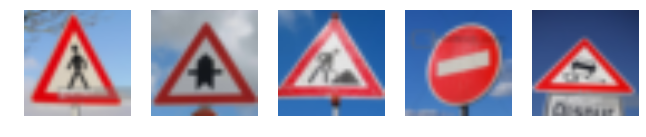

In [72]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import scipy.misc

NEW_IMAGES_FOLDER = './images/'
images = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']


def resize_image(image_file):
    image = plt.imread(NEW_IMAGES_FOLDER + image_file)
    return scipy.misc.imresize(image, (32, 32))

resized_image_data = [resize_image(image) for image in images]

def display_images(imgs_data, grey = False):
    index = 1
    plt.figure(figsize=(11,7))
    for img  in imgs_data:
        plt.subplot(1, 5, index)
        plt.imshow(img[:,:,0]) if grey else plt.imshow(img,)
        plt.axis('off')
        index += 1
    plt.show()
    
display_images(resized_image_data)

In [68]:
preprocessed_images = preprocessing(np.array(resized_image_data))

C:\Users\Saurabh Gupta\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


### Predict the Sign Type for Each Image

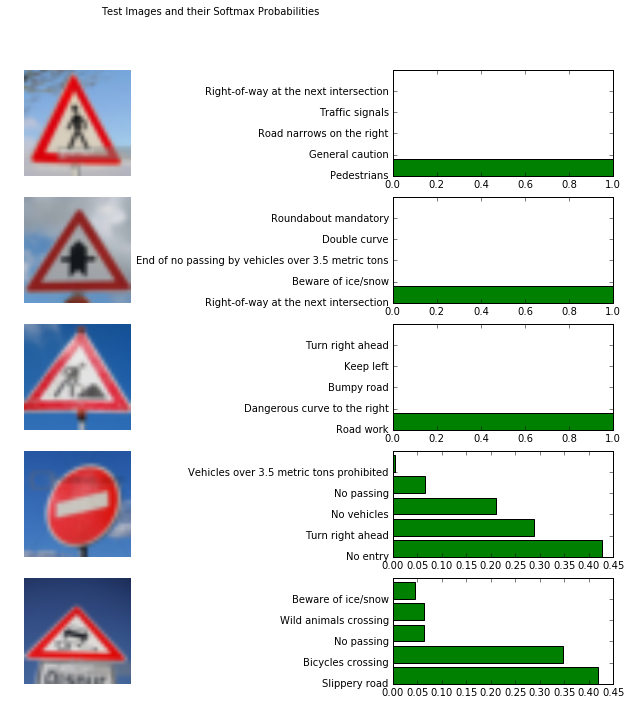

In [79]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import pandas as pd
from matplotlib import gridspec

def print_result(top_k_prob, top_k_indices):
    class_names = pd.read_csv('./signnames.csv')['SignName'].values
    index = 0
    img_index = 0
    plt.figure(figsize=(14, 11))
    gs = gridspec.GridSpec(5, 2, width_ratios=[1, 0.45]) 
    for i in range(5):
        img = resized_image_data[img_index]
        img_index += 1
        plt.subplot(gs[index])
        plt.imshow(img)
        plt.axis('off')
#         plt.title(tag)
        index += 1

        plt.subplot(gs[index])
        plt.barh(np.arange(1, 6, 1), 
                 top_k_prob[i, :],
                 0.8, 
                 color='green')
        plt.yticks(np.arange(1, 6, 1), class_names[top_k_indices[i, :]])
        index += 1
    plt.suptitle('Test Images and their Softmax Probabilities')
    plt.show()

with tf.Session(graph = graph) as sess:
    saver = tf.train.Saver()
    saver.restore(sess, './models/40_exp2_model.ckpt')
    x_batch = preprocessed_images
    feed_dict = {
            tf_x : x_batch, 
            predict_flag : True
        }
    ps = sess.run(predictions, feed_dict)
    top_k_op = tf.nn.top_k(ps, k=5)
    top_k_results = sess.run(top_k_op)
    print_result(top_k_results.values, top_k_results.indices)

### Analyze Performance

As visible from the above visualization, the model performs accurately for all the images. Compared to the rest, the model is less confident for the slippery road image due to the blurriness of the image.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

Already done in above visualization

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.